In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import seaborn as sns


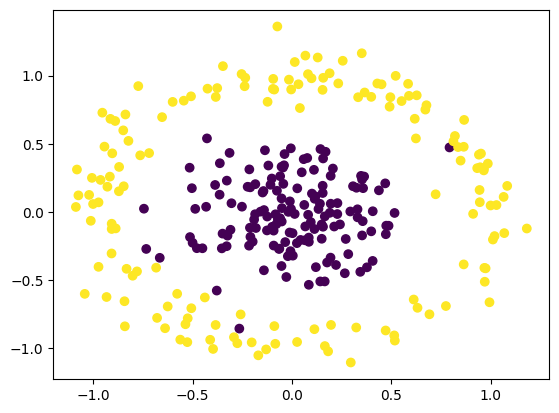

In [3]:

class Sample_1(Dataset):
    def __init__(self, N, r, noise):
        self.N = 2*N
        bl_x1 = np.random.normal(0, noise*r/4, N)
        bl_x2 = np.random.normal(0, noise*r/4, N)
        bl = np.hstack((bl_x1.reshape(N,1), bl_x2.reshape(N,1)))
        t = np.random.uniform(0, 2*np.pi, N)
        r_x1 = r * np.cos(t) + np.random.normal(0, noise*r/10, N)
        r_x2 = r * np.sin(t) + np.random.normal(0, noise*r/10, N)
        red = np.hstack((r_x1.reshape(N,1), r_x2.reshape(N,1)))
        
        self.x = torch.from_numpy(np.vstack((bl, red)))
        bl_y = -np.ones(shape=(N,1))
        r_y = np.ones(shape=(N,1))  
        self.y = torch.from_numpy(np.vstack((bl_y, r_y)))
    
    def __len__(self):
        return self.N
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __getall__(self):
        return self.x, self.y
        
sample = Sample_1(150, 1, 1)
X, Y = sample.__getall__()
X, Y = X.numpy(), Y.numpy()

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

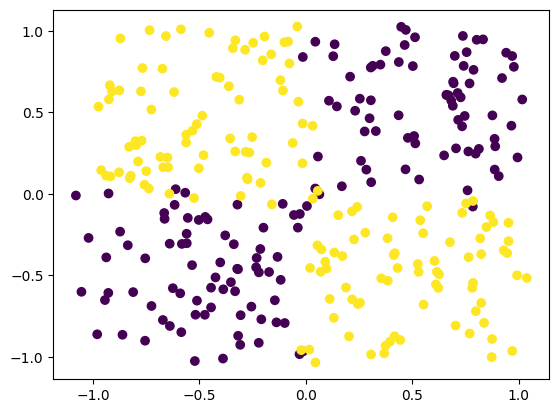

In [4]:
class Sample_2(Dataset):
    def __init__(self, N, side, noise):
        self.N = 2*N
        sigm = noise*side / 25
        
        bl_x1 = np.random.uniform(0, side, N) + np.random.normal(0, sigm, N)
        bl_x2 = np.random.uniform(0, side, N) + np.random.normal(0, sigm, N)
        bl_x1[:int(N/2)] = -bl_x1[:int(N/2)]
        bl_x2[:int(N/2)] = -bl_x2[:int(N/2)]
        bl = np.hstack((bl_x1.reshape(N,1), bl_x2.reshape(N,1)))
        
        t = np.random.uniform(0, 2*np.pi, N)
        r_x1 = np.random.uniform(0, side, N) + np.random.normal(0, sigm, N)
        r_x2 = np.random.uniform(0, side, N) + np.random.normal(0, sigm, N)
        r_x1[:int(N/2)] = -r_x1[:int(N/2)]
        r_x2[int(N/2):] = -r_x2[int(N/2):]
        red = np.hstack((r_x1.reshape(N,1), r_x2.reshape(N,1)))
        
        self.x = torch.from_numpy(np.vstack((bl, red)))
        bl_y = -np.ones(shape=(N,1))
        r_y = np.ones(shape=(N,1))  
        self.y = torch.from_numpy(np.vstack((bl_y, r_y)))
    
    def __len__(self):
        return self.N
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __getall__(self):
        return self.x, self.y

sample = Sample_2(150, 1, 1)
X, Y = sample.__getall__()
X, Y = X.numpy(), Y.numpy()

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

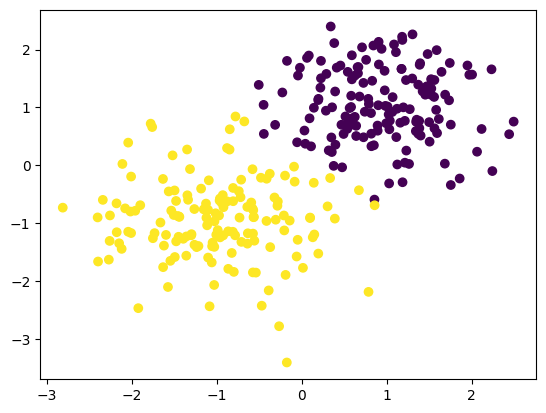

In [5]:
class Sample_3(Dataset):
    def __init__(self, N, center, noise):
        self.N = 2*N
        sigm = noise * center / 1.5 
        
        bl_x1 = np.random.normal(center, sigm, N)
        bl_x2 = np.random.normal(center, sigm, N)
        bl = np.hstack((bl_x1.reshape(N,1), bl_x2.reshape(N,1)))
        
        t = np.random.uniform(0, 2*np.pi, N)
        r_x1 = np.random.normal(-center, sigm, N)
        r_x2 = np.random.normal(-center, sigm, N)
        red = np.hstack((r_x1.reshape(N,1), r_x2.reshape(N,1)))
        
        self.x = torch.from_numpy(np.vstack((bl, red)))
        bl_y = -np.ones(shape=(N,1))
        r_y = np.ones(shape=(N,1))  
        self.y = torch.from_numpy(np.vstack((bl_y, r_y)))
    
    def __len__(self):
        return self.N
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __getall__(self):
        return self.x, self.y
        
sample = Sample_3(150, 1, 1)
X, Y = sample.__getall__()
X, Y = X.numpy(), Y.numpy()

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()


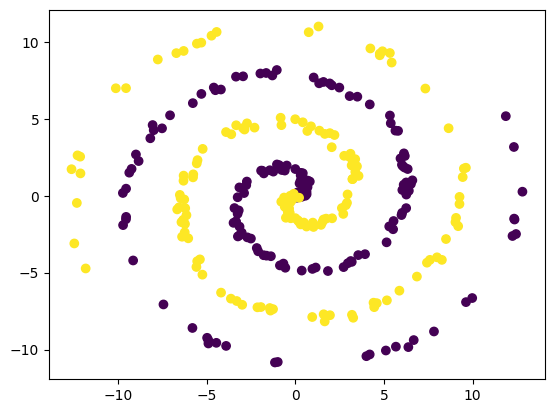

In [6]:
class Sample_4(Dataset):
    def __init__(self, N, spiral_len, noise):
        self.N = 2*N
        t = np.random.uniform(0, spiral_len, N)
        sigm = noise * 0.3
        
        bl_x1 = t * np.cos(t) + np.random.uniform(-sigm, sigm, N)
        bl_x2 = t * np.sin(t) + np.random.uniform(-sigm, sigm, N)
        bl = np.hstack((bl_x1.reshape(N,1), bl_x2.reshape(N,1)))
        
        r_x1 = t * -np.cos(t) + np.random.uniform(-sigm, sigm, N)
        r_x2 = t * -np.sin(t) + np.random.uniform(-sigm, sigm, N)
        red = np.hstack((r_x1.reshape(N,1), r_x2.reshape(N,1)))
        
        self.x = torch.from_numpy(np.vstack((bl, red)))
        bl_y = -np.ones(shape=(N,1))
        r_y = np.ones(shape=(N,1))  
        self.y = torch.from_numpy(np.vstack((bl_y, r_y)))
    
    def __len__(self):
        return self.N
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __getall__(self):
        return self.x, self.y
        
sample = Sample_4(150, 13, 1) # 13 is ideal
X, Y = sample.__getall__()
X, Y = X.numpy(), Y.numpy()

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()


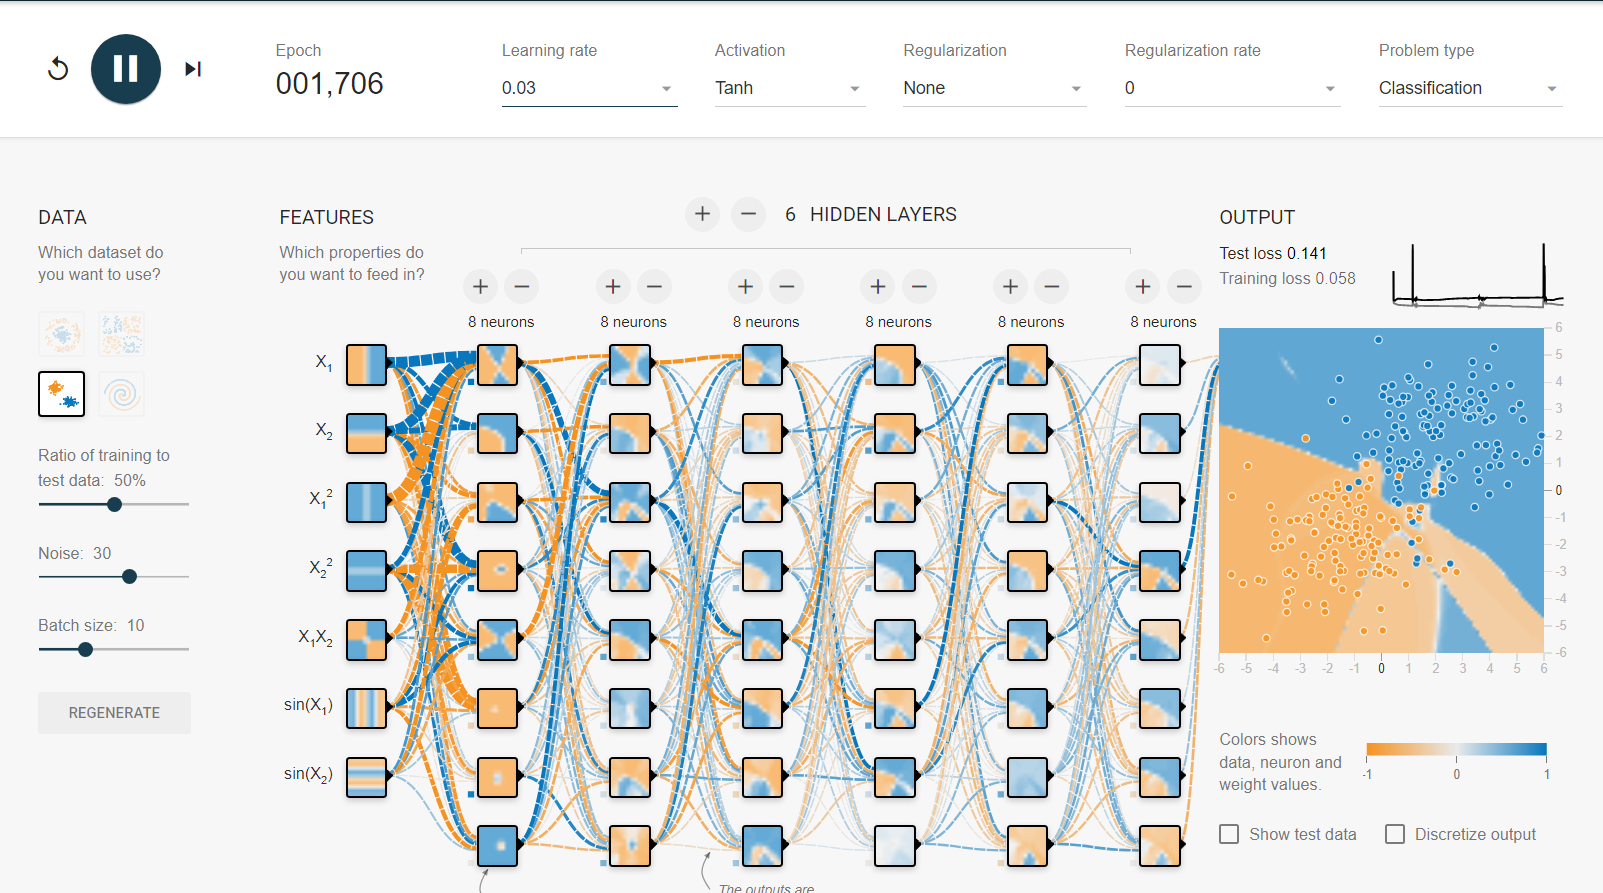 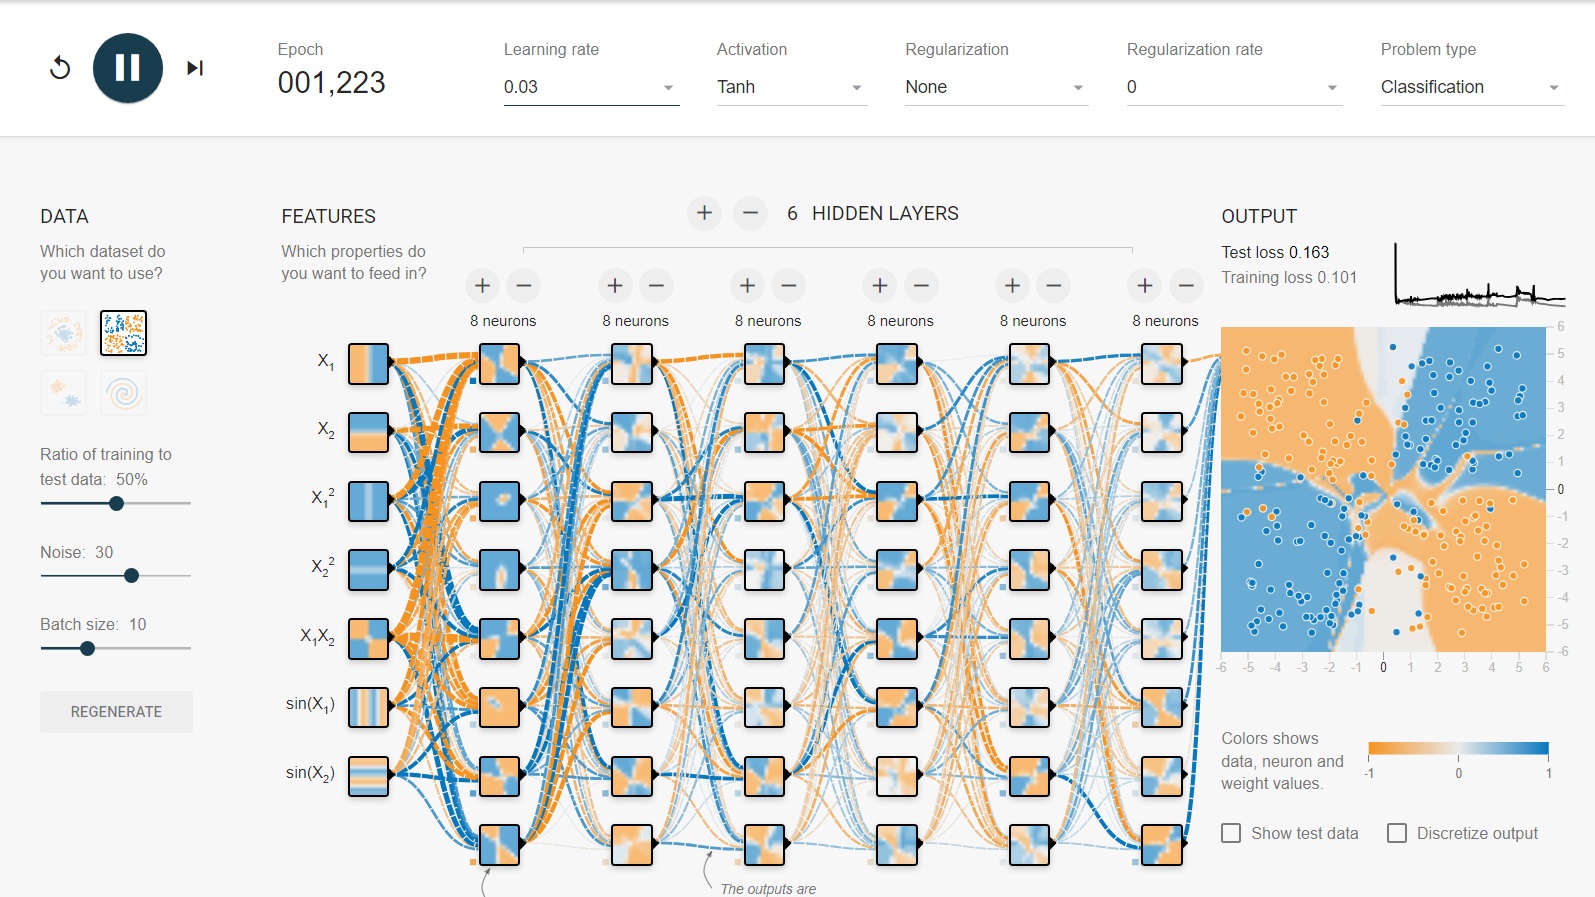 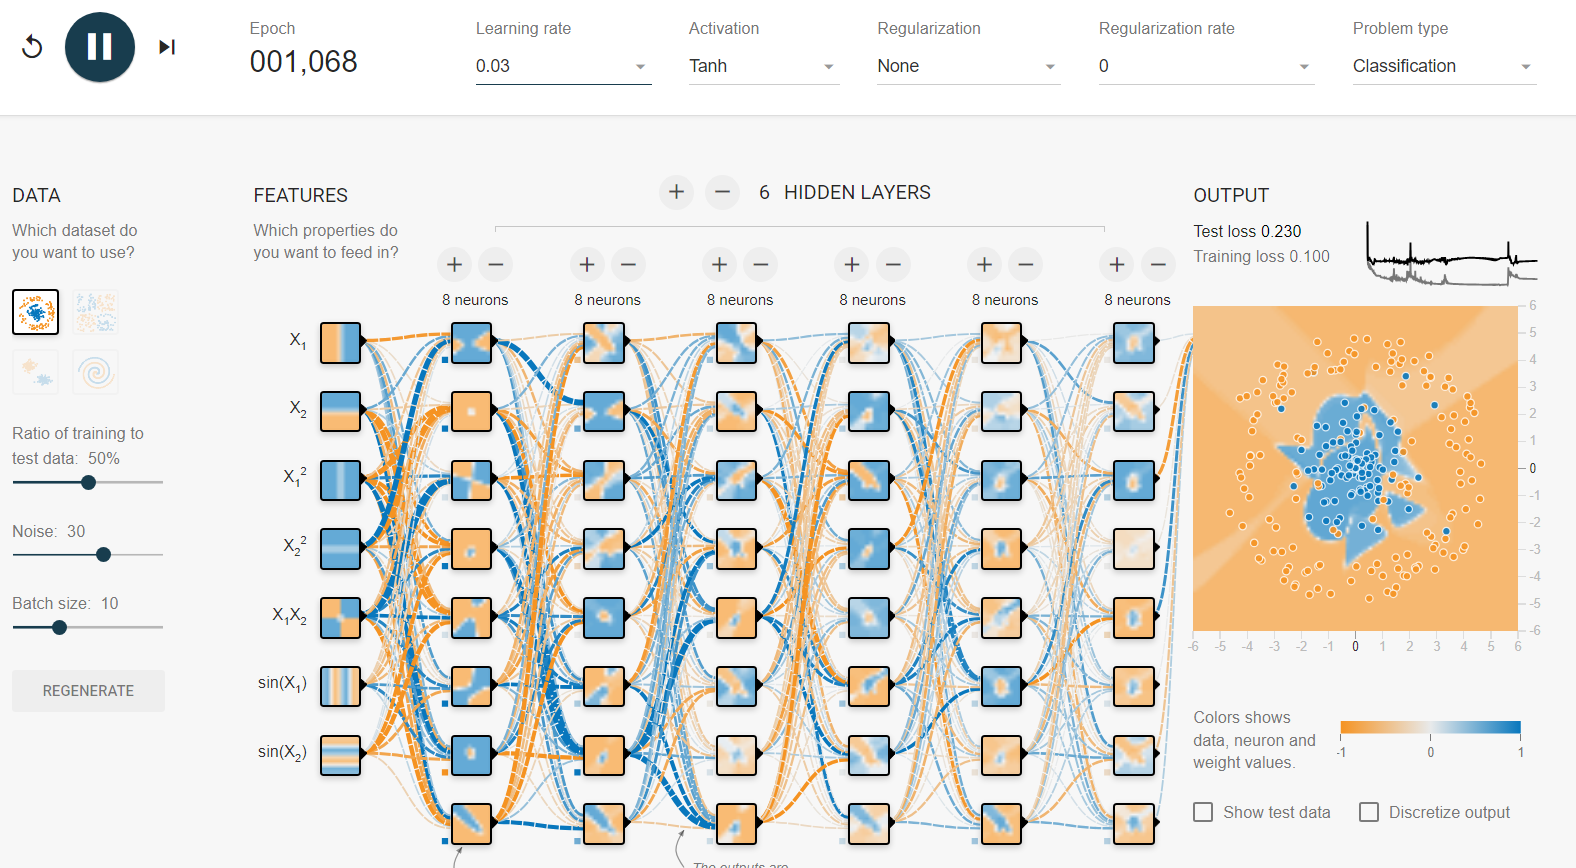 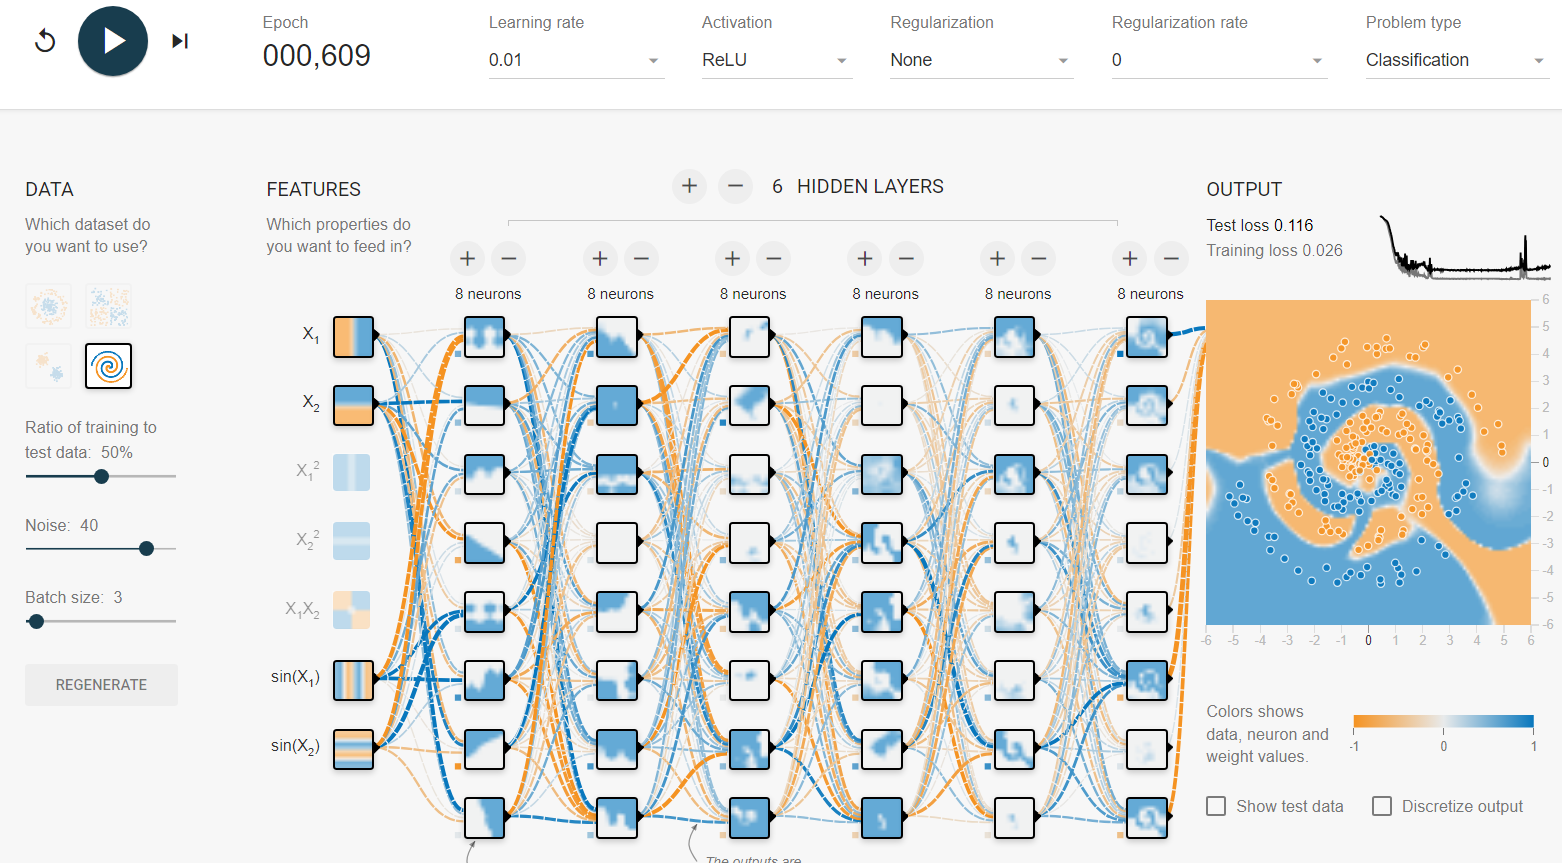

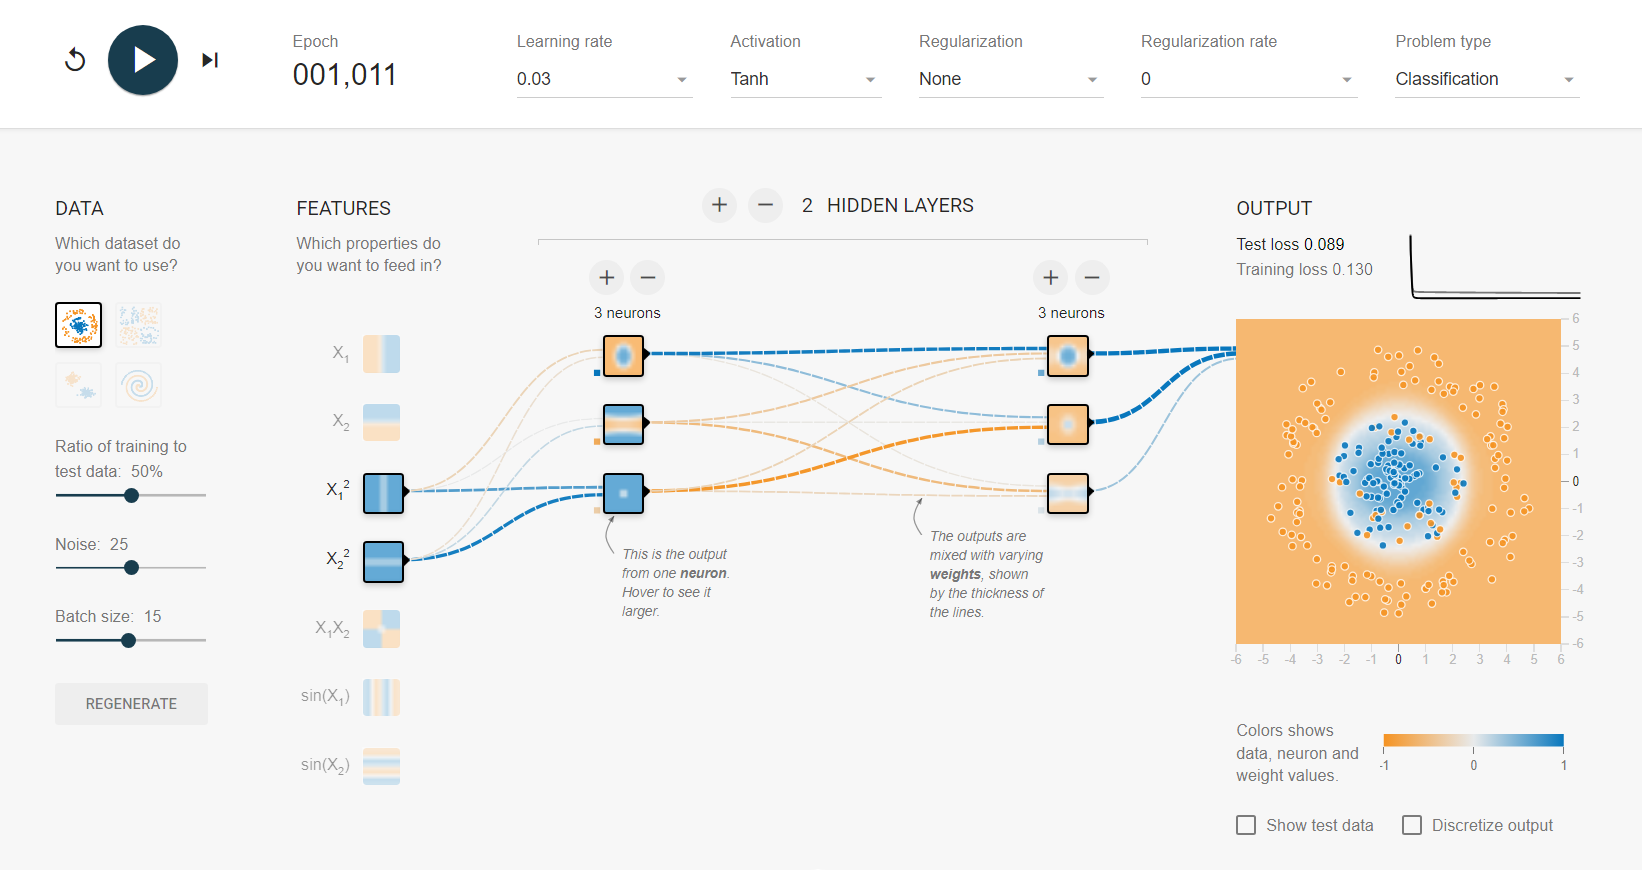 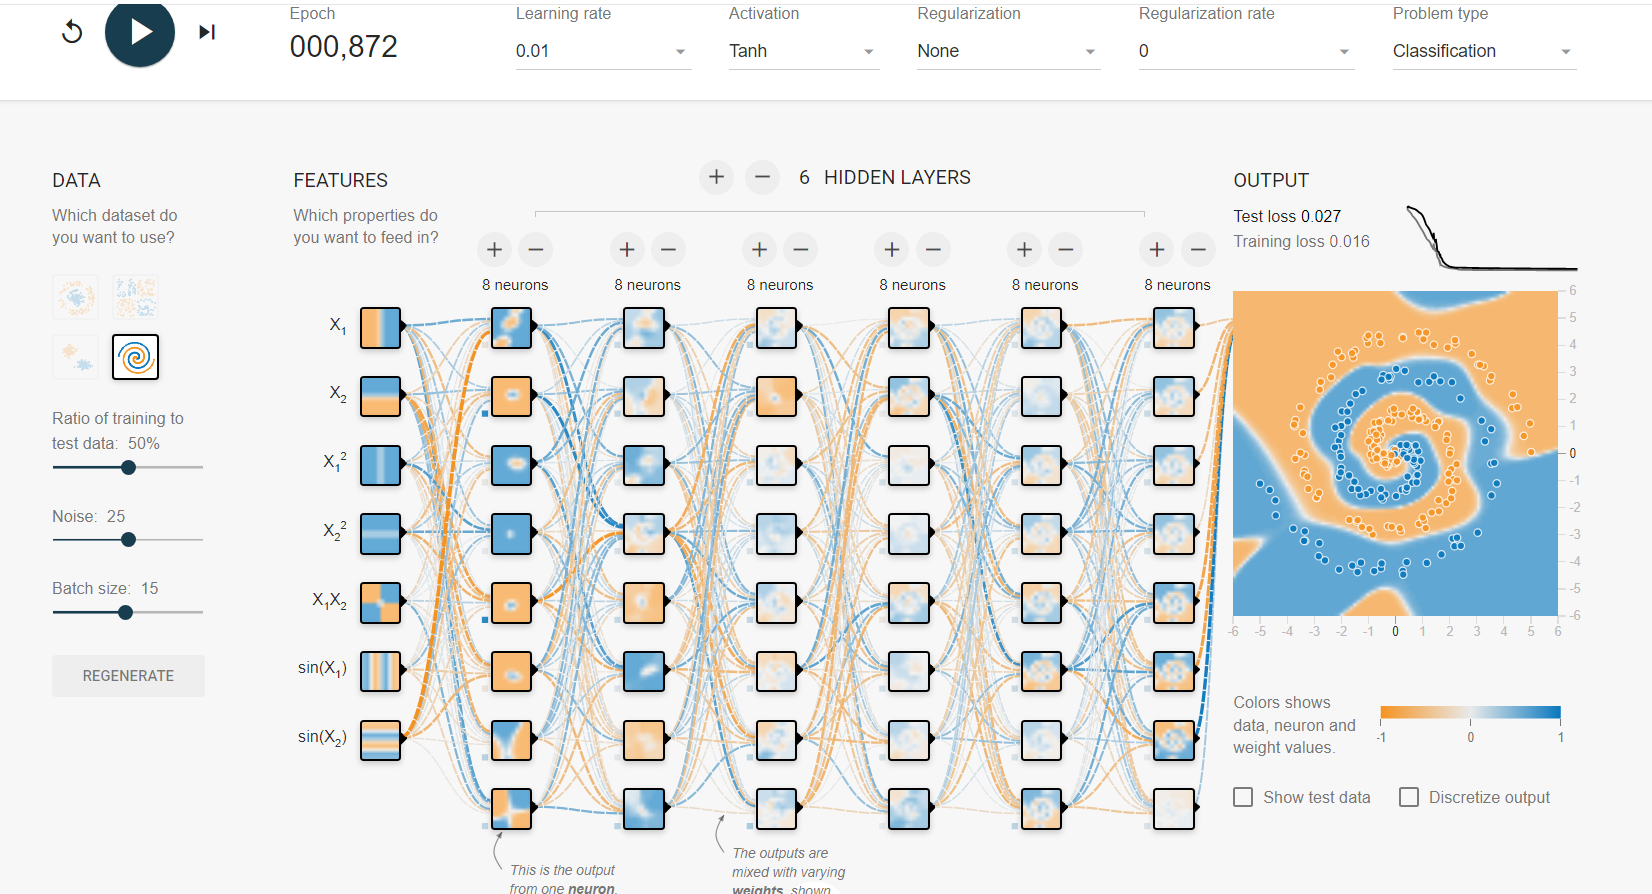 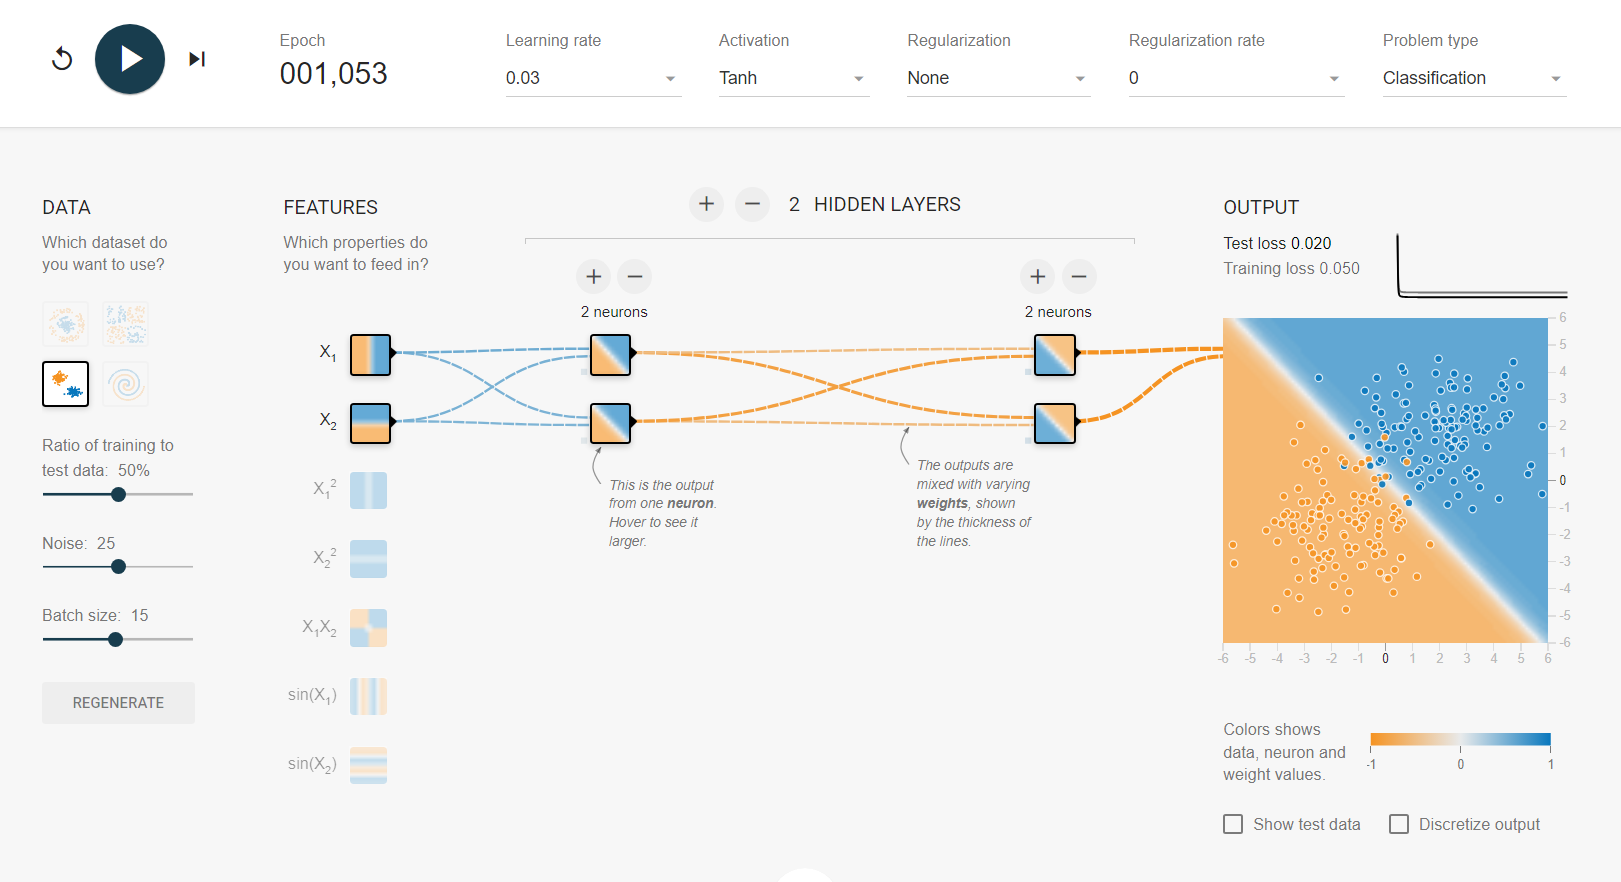 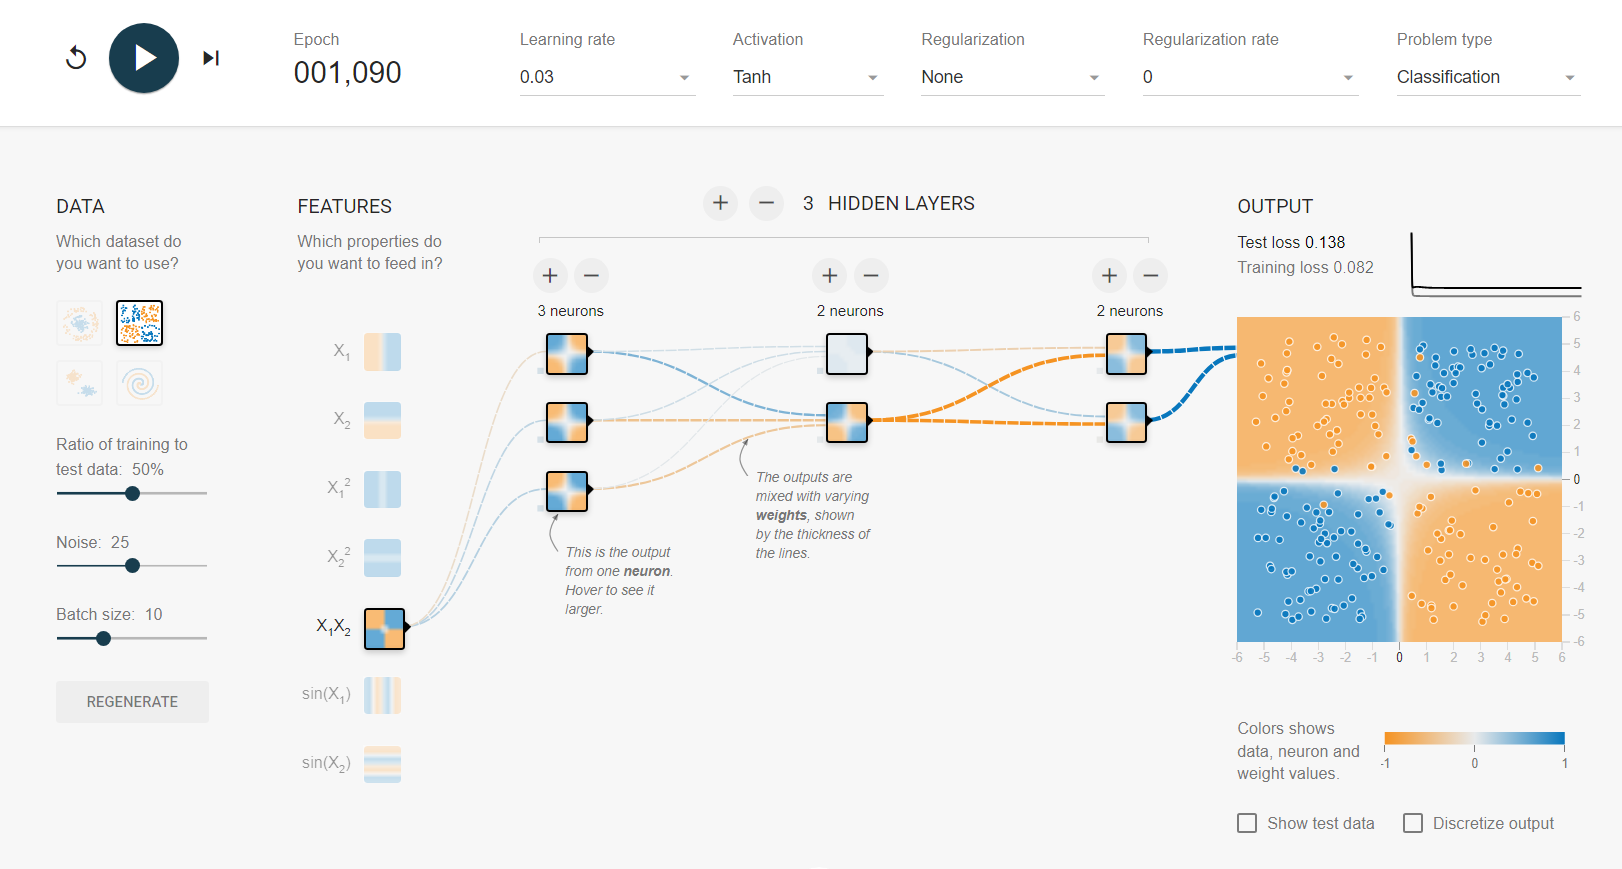

In [7]:
import torch.nn as nn
from sklearn.metrics import confusion_matrix

def draw_line(XY, w: torch.Tensor):
    with torch.no_grad():
        X, Y = XY.__getall__()
        x_min, x_max = torch.min(X[:,0]), torch.max(X[:,0])
        y_min, y_max = torch.min(X[:,1]), torch.max(X[:,1])
        plt.ylim(1.2*y_min, 1.2*y_max)
        plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy())
        k = -w[0]/w[1]
        plt.plot([x_min, x_max], [x_min*k+w[2], x_max*k+w[2]], 'r')
        
def draw_heatmap(y_pred, y_true):
    with torch.no_grad():
        conf_matr = confusion_matrix(y_true, y_pred)
        classes = ['-1', '1']
        dataframe = pd.DataFrame(conf_matr, index=classes, columns=classes)
        sns.heatmap(dataframe, annot=True, cbar=False, cmap="YlGnBu",fmt="d")
        
train = Sample_3(100, 1, 1.1)
test = Sample_3(100, 1, 1.1)

In [8]:
class Perceptron_sign(nn.Module):
    def __init__(self, epoch, batch_size, lr):
        super().__init__()
        self.epoch = epoch
        self.batch_size = batch_size
        self.lr=lr
    
    def forward(self, X):
        Y_pred = torch.mm(X, self.w)
        return torch.sign(Y_pred)
    
    def train(self, X: torch.Tensor, Y: torch.Tensor):
        self.w = torch.randn(size=(3,1), requires_grad=False, dtype=torch.float64)
        N = X.shape[0]
        X = torch.cat((X, torch.ones(N).reshape((N, 1))), dim=1)
        
        for i in range(self.epoch):
            indices = torch.randperm(N)
            X, Y = X[indices], Y[indices]
            for i in range(0, N - self.batch_size, self.batch_size):
                X_batch, Y_batch = X[i:i+self.batch_size], Y[i:i+self.batch_size]
                Y_pred = self.forward(X_batch)
                self.w = self.w + self.lr*torch.mm(X_batch.T, (Y_batch - Y_pred) / 2) # Y_batch - Y_pred 0 if Y_pred is true, -2 and 2 otherwise
                
    def predict(self, X):
        N = X.shape[0]
        X = torch.cat((X, torch.ones(N).reshape((N, 1))), 1)
        return self.forward(X)
    
    def get_w(self):
        return self.w.reshape((-1,))

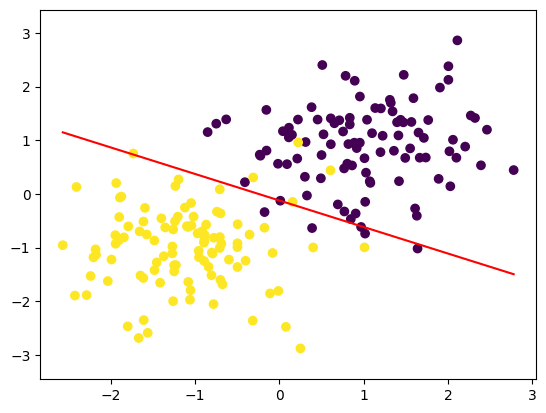

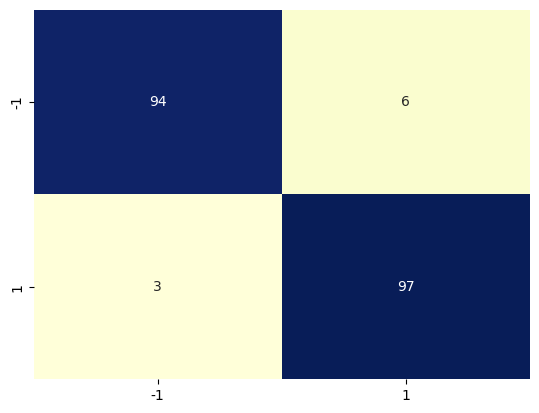

In [9]:
perceptron = Perceptron_sign(10, 10, 0.01)
X, Y = train.__getall__()
perceptron.train(X, Y)

draw_line(train, w=perceptron.get_w())
plt.show()

x, y_true = test.__getall__()
y_pred = perceptron.predict(x)
draw_heatmap(y_pred, y_true)

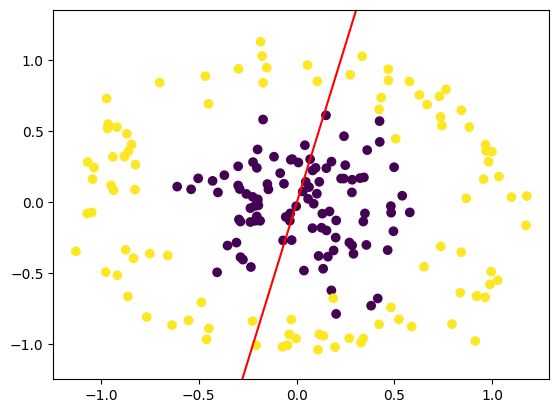

In [10]:
perceptron = Perceptron_sign(10, 10, 0.01)
train_1 = Sample_1(100, 1, 1.1)
test_1 = Sample_1(100, 1, 1.1)
X, Y = train_1.__getall__()
perceptron.train(X, Y)

draw_line(train_1, w=perceptron.get_w())
plt.show()


In [11]:
class Perceptron_sigm(nn.Module):
    def __init__(self, epoch, batch_size, lr):
        super().__init__()
        self.epoch = epoch
        self.batch_size = batch_size
        self.lin = nn.Linear(2, 1, dtype=torch.float64, )
        self.optimizer = torch.optim.Adam(self.lin.parameters(), lr)
        self.loss_f = nn.MSELoss()
    
    def train(self, X: torch.Tensor, Y: torch.Tensor):
        N = X.shape[0]
        
        for i in range(self.epoch):
            indices = torch.randperm(N)
            X, Y = X[indices], Y[indices]
            for j in range(0, N - self.batch_size, self.batch_size):
                X_batch, Y_batch = X[j:j+self.batch_size], Y[j:j+self.batch_size]
                self.lin.zero_grad()
                Y_pred = self.lin(X_batch)
                loss = self.loss_f(Y_pred, Y_batch)
                loss.backward()
                self.optimizer.step()
                  
    def predict(self, X):
        return torch.sign(self.lin(X))
    
    def get_w(self):
        return torch.cat([param.reshape((-1,)) for param in self.lin.parameters()])

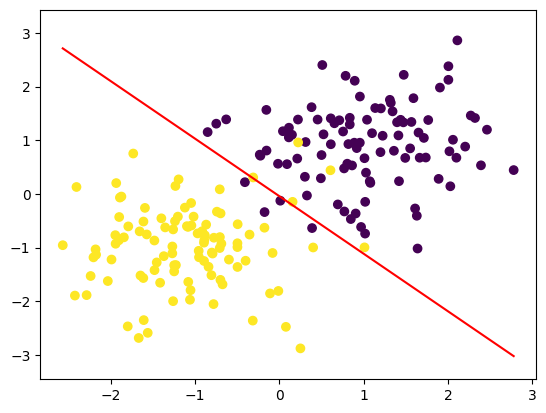

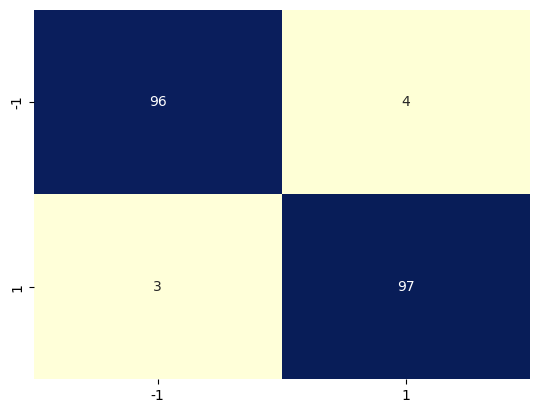

In [12]:
perceptron = Perceptron_sigm(10, 10, 0.01)
X, Y = train.__getall__()
perceptron.train(X, Y)

draw_line(train, w=perceptron.get_w())
plt.show()

x, y_true = test.__getall__()
y_pred = perceptron.predict(x)

draw_heatmap(y_pred, y_true)

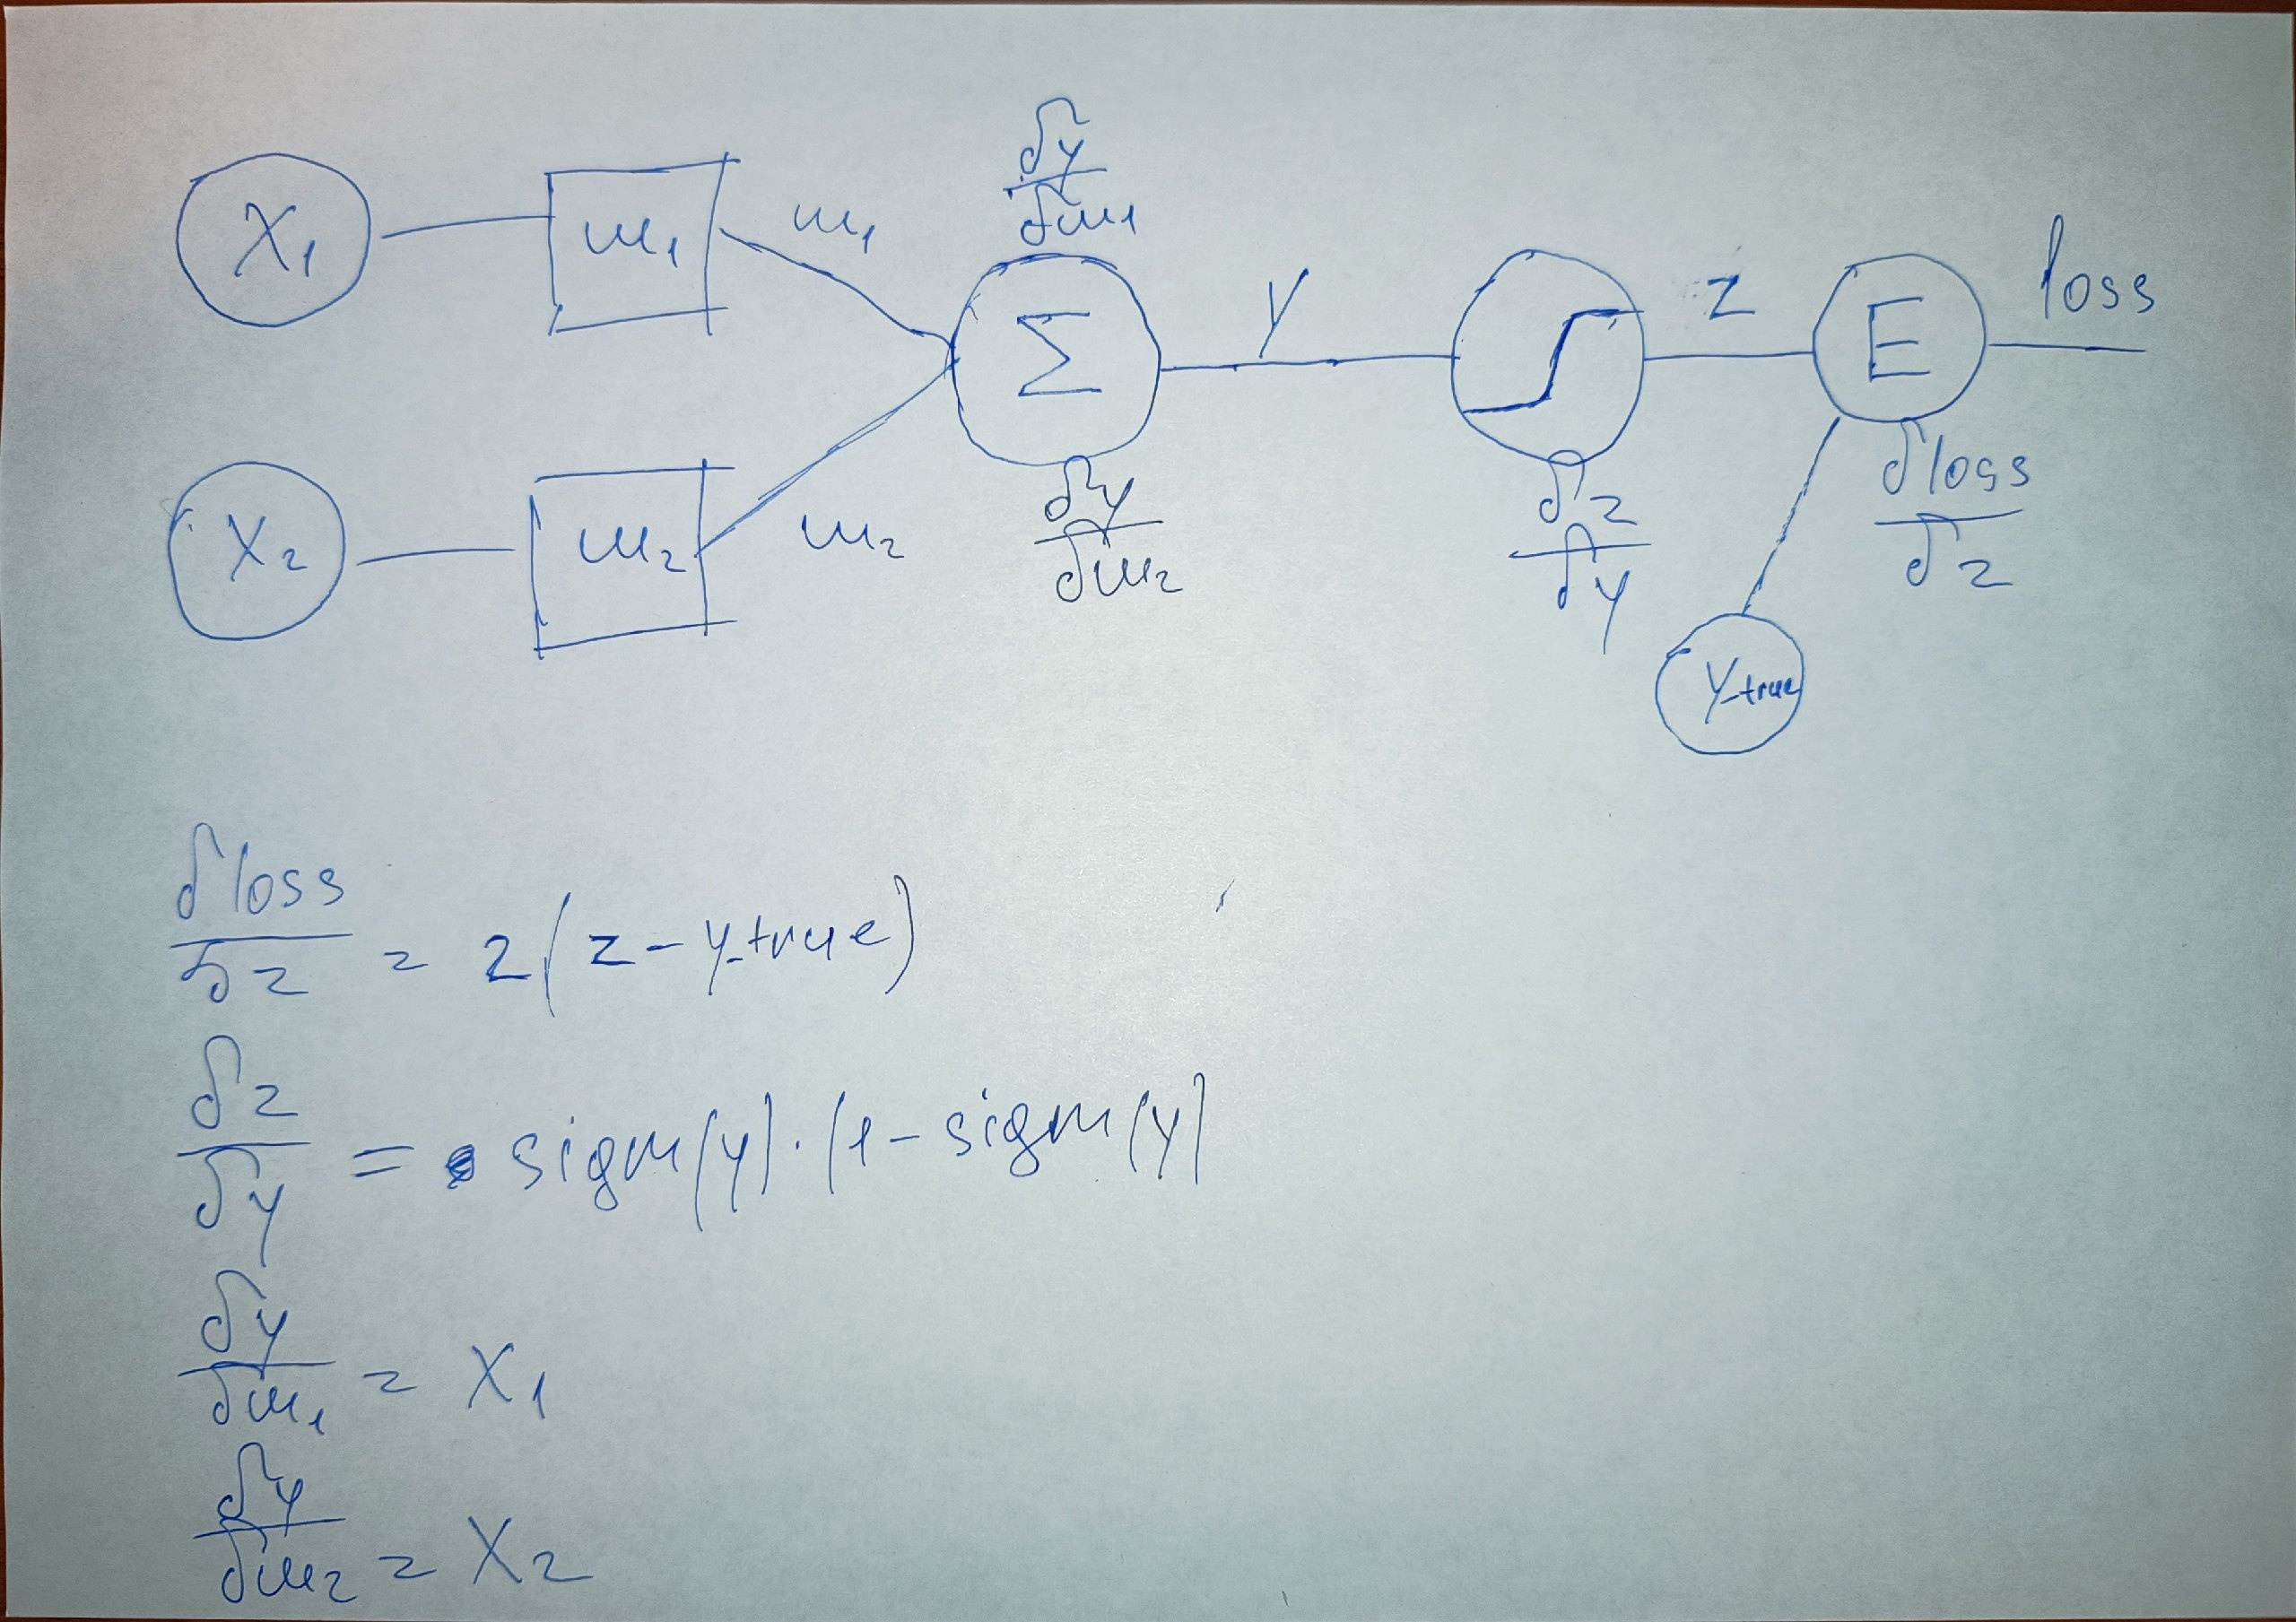

In [13]:
class Ansamble:
    def __init__(self, model, models_num, train_size, epoch, batch_size, lr):
        self.train_size = train_size
        self.models_num = models_num
        self.models = [model(epoch, batch_size, lr) for _ in range(models_num)]
    
    def train(self, X: torch.Tensor, Y: torch.Tensor):
        N = X.shape[0]
        n = int(self.train_size * N)
        for model in self.models:
            indices = torch.randperm(N)
            model.train(X[indices[:n]], Y[indices[:n]])
                        
    def predict(self, X):
        answers = torch.zeros((X.shape[0],1))
        for model in self.models:
            answers += model.predict(X)
        answers = torch.sign(answers)
        answers.detach().apply_(lambda x: x if x != 0 else 1.0 if np.random.randint(0, 2, 1) == 1 else -1.0)
        return answers

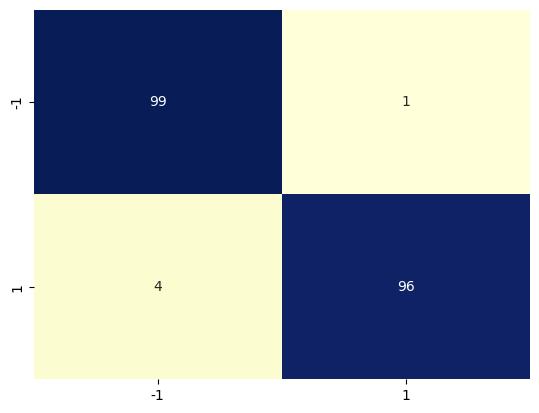

In [14]:
ansamble = Ansamble(Perceptron_sign, 10, 0.3, 10, 5, 0.01)
X, Y = train.__getall__()
ansamble.train(X, Y)

x, y_true = test.__getall__()
y_pred = ansamble.predict(x)

draw_heatmap(y_pred, y_true)


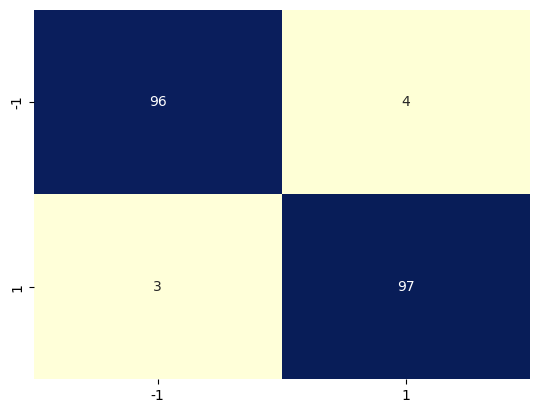

In [15]:
ansamble = Ansamble(Perceptron_sigm, 10, 0.3, 10, 5, 0.01)
X, Y = train.__getall__()
ansamble.train(X, Y)

x, y_true = test.__getall__()
y_pred = ansamble.predict(x)

draw_heatmap(y_pred, y_true)
